### v4, epochs 500

In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.11.0'

In [6]:
train_data_path = r"G:\obs_studio\SAP_BTP\Malaria_own\Dataset\train" 
validation_data_path = r"G:\obs_studio\SAP_BTP\Malaria_own\Dataset\val"

In [7]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [8]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 416 images belonging to 2 classes.


In [9]:
training_data.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [10]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 72 images belonging to 2 classes.


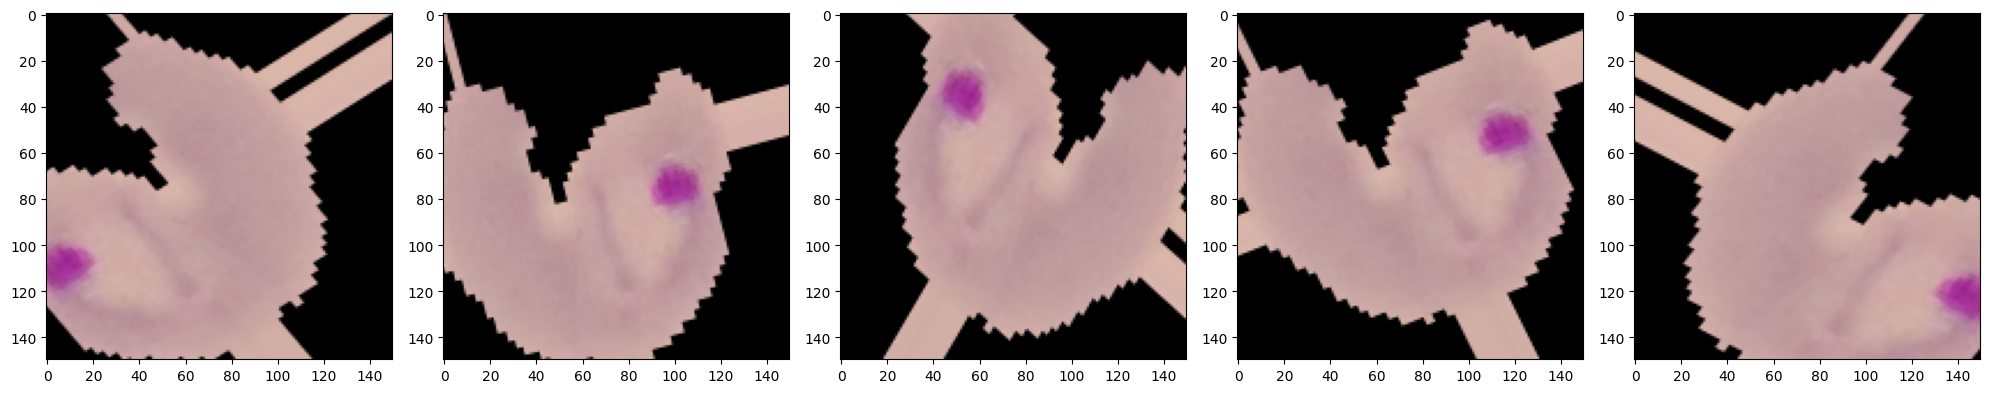

In [11]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [12]:
# save best model using vall accuracy
model_path = 'G:\obs_studio\SAP_BTP\Malaria_own\malaria_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\swapn\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
# train cnn model
history = cnn_model.fit(training_data,
                          epochs=500,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
13/13 [==============================] - ETA: 0s - loss: 0.9747 - accuracy: 0.4543
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to G:\obs_studio\SAP_BTP\Malaria_own\malaria_model.h5
13/13 [==============================] - 8s 555ms/step - loss: 0.9747 - accuracy: 0.4543 - val_loss: 0.7718 - val_accuracy: 0.5000
Epoch 2/500
13/13 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.5361
Epoch 2: val_accuracy did not improve from 0.50000
13/13 [==============================] - 7s 531ms/step - loss: 0.8085 - accuracy: 0.5361 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 3/500
13/13 [==============================] - ETA: 0s - loss: 0.7714 - accuracy: 0.5361
Epoch 3: val_accuracy did not improve from 0.50000
13/13 [==============================] - 7s 515ms/step - loss: 0.7714 - accuracy: 0.5361 - val_loss: 0.7054 - val_accuracy: 0.5000
Epoch 4/500
13/13 [==============================] - ETA: 0s - loss: 0.7702 - accuracy: 0.5240
Epoch

In [17]:
model_path2 = r'G:\obs_studio\SAP_BTP\Malaria_own\v4_1_pred_malaria_det.h5'
cnn_model.save(model_path2)


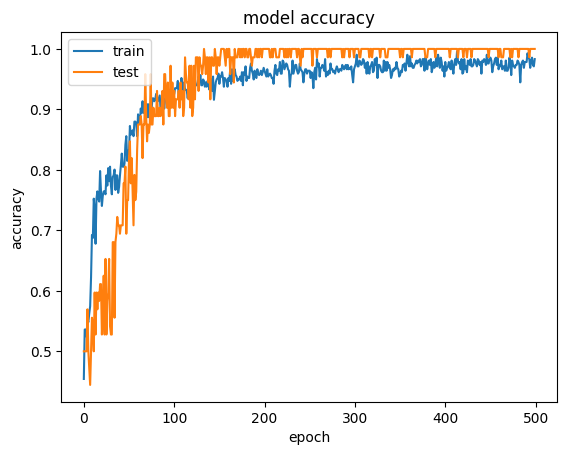

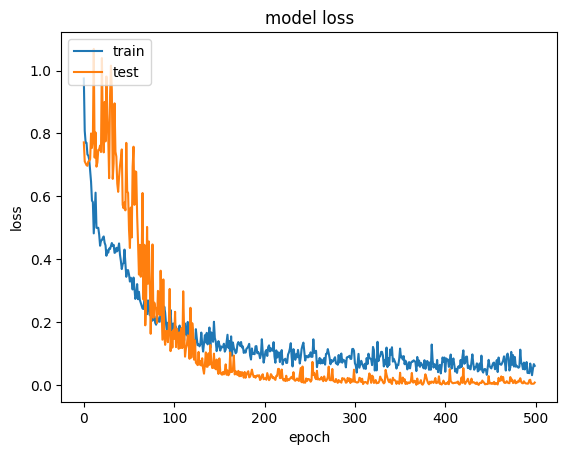

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
history.history

{'loss': [0.9746513366699219,
  0.8084588646888733,
  0.7713501453399658,
  0.7702071666717529,
  0.7333425283432007,
  0.7295799851417542,
  0.7164625525474548,
  0.6821575164794922,
  0.6468187570571899,
  0.5868264436721802,
  0.582179605960846,
  0.48279884457588196,
  0.5473689436912537,
  0.6120632290840149,
  0.5004772543907166,
  0.4998938739299774,
  0.5006744861602783,
  0.478620707988739,
  0.44358646869659424,
  0.45959270000457764,
  0.46154531836509705,
  0.4684447646141052,
  0.47305828332901,
  0.45324578881263733,
  0.4447508156299591,
  0.4117831885814667,
  0.42879539728164673,
  0.42139166593551636,
  0.43468302488327026,
  0.4330967664718628,
  0.44238075613975525,
  0.4522184729576111,
  0.44265875220298767,
  0.44650083780288696,
  0.4209548830986023,
  0.42257216572761536,
  0.4371495842933655,
  0.4258836507797241,
  0.43532994389533997,
  0.4508030116558075,
  0.4151797294616699,
  0.39491236209869385,
  0.3694853186607361,
  0.38555559515953064,
  0.388748288